<a href="https://colab.research.google.com/github/MichaelGajhede/BiBi_enzyme_kinetics/blob/main/BiBi_seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

From Marangoni, Alejandro G., Enzyme kinetics : A modern approach 2003, Wiley
![picture](https://drive.google.com/uc?id=1WuEcGPH00CQM7L2Eivc4Oed3s5TIFjEj)

In [ ]:
#MM 2 substrate sequential ordered rate function
def BiBi(X,  Vmax, Ks_A, K_AB):

  C_A = np.hsplit(X, len(X[0]))[0]
  C_B = np.hsplit(X, len(X[0]))[1]

  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + C_A * C_B

  Vi = nom/den
  return Vi.flatten()

From Marangoni, Alejandro G., Enzyme kinetics : A modern approach 2003, Wiley
![picture](https://drive.google.com/uc?id=1O0xGxA6dXDYqd7YwHS34M44RhqHXIyII)
Random order sequential reaction

In [ ]:
#MM 2 substrate sequential random ordered rate function
def BiBi_random(X,  Vmax, Ks_A, Ks_B, K_AB, K_BA):

  C_A = np.hsplit(X, len(X[0]))[0]
  C_B = np.hsplit(X, len(X[0]))[1]

  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + K_BA * C_B + C_A * C_B

  Vi = nom/den
  return Vi.flatten()

In [ ]:
# Reproduce the model from Lotta et al, 1995, Biochemistry, 34, 4201-4210 and and noise to simulate experimental data
x_SAM = np.linspace(10, 200, 6)
x_NAS = np.linspace(20, 900, 6)

X,Y = np.meshgrid(x_SAM, x_NAS)


xdata = np.column_stack((X.flatten(), Y.flatten()))

Vmax = 37
Ks_A = 23
K_AB = 207


v = BiBi(xdata,  Vmax, Ks_A, K_AB)


noise = np.random.normal(0, .05*v, len(v))
v1 = v + noise


In [ ]:
# Import curve_fit from scipy.optimize and determine parameters from the noised data
import os
from scipy.optimize import curve_fit

popt, pcov = curve_fit(BiBi, xdata, v1)
variance = [pcov[0][0], pcov[1][1], pcov[2][2]]
np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x)})
print('Model parameters: ', popt)
print('ESD             : ', np.sqrt(variance))
print('Overfit estimate: ', np.linalg.cond(pcov))

Model parameters:  [36.8 22.2 207.4]
ESD             :  [1.1 3.0 21.4]
Overfit estimate:  4281.631780963655


In [ ]:
#MM 2 substrate sequential ordered function plotting version
def BiBi_mesh(X,Y,  Vmax, Ks_A, K_AB):

  C_A = X
  C_B = Y

  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + C_A * C_B
  Vi = nom/den

  return Vi

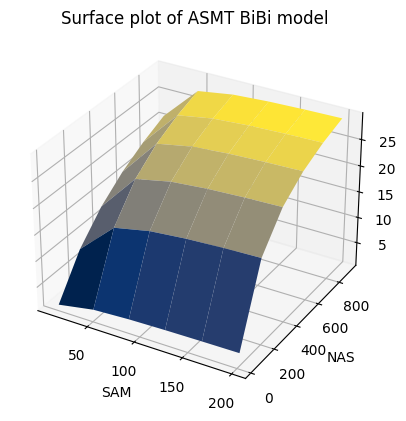

In [ ]:
# Import libraries for plotting and plot velocities from Lotta paper
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y = np.meshgrid(x_SAM, x_NAS)

Z = BiBi_mesh(X,Y,  Vmax, Ks_A, K_AB)

# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.set_xlabel('SAM')
ax.set_ylabel('NAS')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT BiBi model')
plt.show()

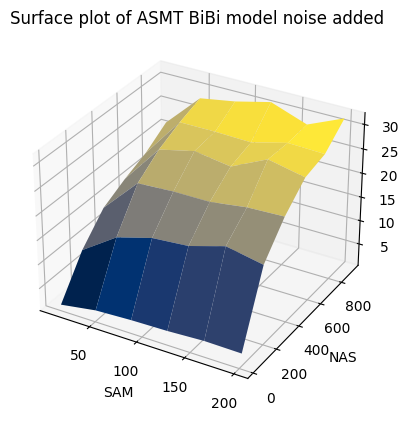

In [ ]:
# Plot data with noise

# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y = np.meshgrid(x_SAM, x_NAS)

Z = BiBi_mesh(X,Y,  Vmax, Ks_A, K_AB)

noise = np.random.normal(0, 0.05*Z, (len(Z),len(Z)))


Z = Z + noise

# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.set_xlabel('SAM')
ax.set_ylabel('NAS')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT BiBi model noise added')
plt.show()

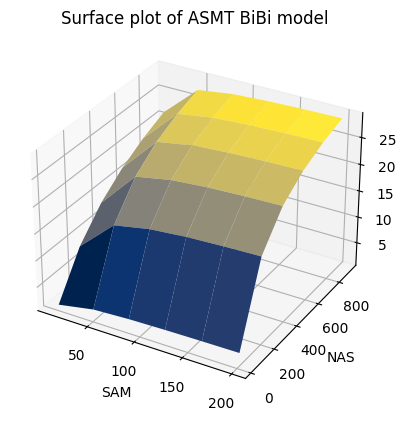

In [ ]:
# Plot velocities from curve_fit determined parameters

# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y = np.meshgrid(x_SAM, x_NAS)

Vmax = 36
Ks_A = 21
K_AB = 197


Z = BiBi_mesh(X,Y,  Vmax, Ks_A, K_AB)

# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.set_xlabel('SAM')
ax.set_ylabel('NAS')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT BiBi model')
plt.show()

In [ ]:
def GoF(y, y_fit):
# Goodnes if Fit function
  # residual sum of squares
  ss_res = np.sum((y - y_fit) ** 2)

  # total sum of squares
  ss_tot = np.sum((y - np.mean(y)) ** 2)

  # r-squared
  r2 = 1 - (ss_res / ss_tot)
  return r2